You are suggested to use suitable descriptive statistics and visualisation to better understand the data you have available. You need to consider various data pre-processing techniques such as data transformation, discretisation, cleaning, normalisation, standardisation, smoothing, feature construction and use them if necessary.


# Proprocessing

**Steps**
* Step 1: Find columns whose results are all 0 or 1, and remove them from the dataframe
* Step 2: Find columns where most of the rows are the same value, and remove these columsn from the dataframe
* Step 3: Find duplicate columns and remove one of them from the dataframe
* Step 4: Rescale columns whose value range is smaller than (0,1) by using MinMaxScaler
* Step 5: Normalise columns with sparse data (i.e. with lots of "0"s)
* Step 6: Standardise Data with `StandardScaler`  and numpy's `log` transform function

**Results**

**Further Actions**
* Step 7: Discretization with `KBinsDiscretizer` or `Binarizer` (to be done)

In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

trainingData = pd.read_csv("Datasets/train_imperson_without4n7_balanced_data.csv")
testingData = pd.read_csv("Datasets/test_imperson_without4n7_balanced_data.csv")

x_training = trainingData.iloc[:,0:152] # the dataset without the last column (the prediction target)
y_training = trainingData.iloc[:,152]

x_testing = testingData.iloc[:,0:152]
y_testing = testingData.iloc[:,152]

x_training.head()

,1,2,3,5,6,8,9,10,11,12,...,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


### Step 1: Find columns whose results are all 0 or 1, and remove them from the dataframe
The new dataframe is called `df3`

In [180]:
df2 = x_training.loc[:,(x_training!=0).any()]
df3 = df2.loc[:,(df2!=1).any()]

print(df3.shape)
df3.head()


(97044, 78)


,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2: Find columns where most of the rows are the same value, and remove these columsn from the dataframe
The new dataframe after this step is called `df4`

In [181]:
from collections import Counter
headers = list(df3.columns.values)
remove_col_list = []

for header in headers:
    # if the most frequent value of the column fills more than 99% of the column, remove it from the dataset
    if Counter(df[header]).most_common()[0][1] >= (df3.shape[0] *0.99):
        remove_col_list.append(header)
        print("column " + header+ "'s value distribution is "+str(Counter(df[header])))

column 14's value distribution is Counter({1: 97023, 0: 21})
column 15's value distribution is Counter({1: 97023, 0: 21})
column 16's value distribution is Counter({1: 97023, 0: 21})
column 18's value distribution is Counter({1: 97023, 0: 21})
column 20's value distribution is Counter({1: 97023, 0: 21})
column 26's value distribution is Counter({1: 97023, 0: 21})
column 29's value distribution is Counter({1: 97023, 0: 21})
column 43's value distribution is Counter({1: 97023, 0: 21})
column 48's value distribution is Counter({0.98108: 96824, 0.97705: 68, 0.9851: 62, 0.9830899999999999: 24, 0.0: 21, 0.97504: 19, 0.9871200000000001: 8, 0.97101: 7, 0.99316: 5, 0.9790700000000001: 5, 0.98913: 1})
column 52's value distribution is Counter({1: 97023, 0: 21})
column 62's value distribution is Counter({1: 97023, 0: 21})
column 72's value distribution is Counter({0: 96944, 1: 100})
column 83's value distribution is Counter({0: 97042, 1: 2})
column 84's value distribution is Counter({0: 97038, 1:

In [182]:
# df4 is the dataframe after dropping these columns where the most frequent value of the column fills 
# the majority of their rows
df4= df3.drop(remove_col_list,axis=1)
print(df4.shape)
print(df4.columns.values)


(97044, 46)
['5' '6' '8' '9' '38' '47' '50' '51' '61' '64' '66' '67' '68' '70' '71'
 '73' '75' '76' '77' '78' '79' '80' '82' '90' '93' '94' '98' '107' '108'
 '110' '118' '119' '120' '122' '126' '127' '128' '129' '130' '140' '141'
 '142' '143' '145' '146' '154']


### Step 3: Find duplicate columns and remove one of them from the dataframe
The new dataframe after this step is called `df5`

We can remove one of columns from each of the pairs below because they are duplicates of each other:
* column"5" and "6"
* column 8" and "9"
* column "145" and "146"

In [183]:
print(sum(df4["5"] == df4["6"]) == df4.shape[0])
print(sum(df4["8"] == df4["9"]) == df4.shape[0])
print(sum(df4["145"]==df4["146"]) == df4.shape[0])

True
True
True


In [184]:
df5= df4.drop(['5','8','145'],axis=1)
df5.shape

(97044, 43)

In [185]:
# Do the same for the testing dataset

# do the same for testing data
dropped_columns = [i for i in list(x_training.columns) if i not in list(df5.columns) ]
x_testing= x_testing.drop(dropped_columns,axis=1)
x_testing.shape

(40158, 43)

### Step 4: Rescale columns whose value range is smaller than (0,1) by using `MinMaxScaler`

It is fine to do this step before normalization because there is no negative values in the dataframe

In [186]:
min_max_dict = {}
col_to_rescale = []
col_not_rescaled = []
for i in df5.columns.values:
    min_max_dict[i] = [df5[i].min(),df5[i].max()] # I've checked and seen that all columns in this dataframe is within the range (0,1)
    if df5[i].min() != 0 or df5[i].max()!=1:
        col_to_rescale.append(i)
    else:
        col_not_rescaled.append(i)

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = df5[col_to_rescale].values
rescaledX = scaler.fit_transform(X)

# join the scaled data back to the unscaled columns, the result is a dataframe df_with_rescaled_cols
df_rescaled_only = pd.DataFrame(rescaledX,columns=col_to_rescale)
df_with_rescaled_cols = pd.concat([df_rescaled_only,df5[col_not_rescaled]], axis=1)
# reorder columns to be smallest to biggest
df_with_rescaled_cols = df_with_rescaled_cols.reindex(sorted(df_with_rescaled_cols.columns, key=lambda x: float(x)), axis=1)

df_with_rescaled_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,127,128,129,130,140,141,142,143,146,154
0,0.000064,0.009150,0.394895,0.88679,0,1,0.70423,0.81818,1.0,0.30769,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000012,0.000000,0.394916,0.43396,0,1,0.70423,0.65909,0.5,1.00000,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036308,0.070588,0.394959,0.00000,1,0,0.59155,0.18182,0.0,0.61538,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005238,0.094771,0.395013,0.00000,1,0,0.14085,0.18182,0.0,0.61538,...,0.500006,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035887,0.070588,0.395055,0.00000,1,0,0.61972,0.18182,0.0,0.61538,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# do the same for testing dataset
testingX = x_testing[col_to_rescale].values
rescaledTestingX = scaler.fit_transform(testingX)

testing_rescaled_only = pd.DataFrame(rescaledTestingX,columns=col_to_rescale)
testing_with_rescaled_cols = pd.concat([testing_rescaled_only,x_testing[col_not_rescaled]],axis=1)
testing_with_rescaled_cols = testing_with_rescaled_cols.reindex(sorted(testing_with_rescaled_cols.columns, key=lambda x: float(x)), axis=1)
testing_with_rescaled_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,127,128,129,130,140,141,142,143,146,154
0,0.002809,0.98824,0.901749,1.00000,0,1,0.69231,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0,0.22215,0.0,0.477300,0.0,0.16667,0.98674
1,0.003637,0.98824,0.901759,1.00000,0,1,0.69231,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0,0.35106,0.0,0.185164,0.0,0.16667,0.98674
2,0.003624,0.98824,0.901759,1.00000,0,1,0.67949,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0,0.43700,0.0,0.475420,0.0,0.16667,0.98674
3,0.006561,0.00000,0.901759,0.43396,0,1,0.75641,0.65909,0.5,1.00000,...,0.0,0.0,0.0,0,0.00000,0.0,0.000000,0.0,0.00000,0.00000
4,0.001672,0.98824,0.901759,1.00000,0,1,0.69231,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0,0.63621,0.0,0.899728,0.0,0.16667,0.98674


In [189]:
# take a look at the skewness of these columns
# * skewness = 0 : normally distributed.
# * skewness > 0 : more weight in the left tail of the distribution.
# * skewness < 0 : more weight in the right tail of the distribution. 

df_with_rescaled_cols.skew()

6      17.200153
9       1.772145
38     -0.977053
47      1.168598
50     -0.881052
51      0.882182
61     -2.572446
64     -1.357737
66     -1.310025
67      0.308908
68     -0.797523
70      3.217715
71      0.672478
73     -0.894060
75     35.206595
76     34.939381
77      8.086345
78     34.913149
79     34.229749
80     92.740886
82      1.433743
90      2.934485
93      3.982461
94      5.714494
98      2.960329
107     8.981833
108     3.111769
110     3.649254
118     2.864029
119    49.177087
120     3.109743
122     5.998186
126     6.592108
127     6.600506
128     6.717656
129     6.592108
130     6.592108
140     0.535234
141    10.375253
142     0.768811
143    12.177543
146     1.783121
154     1.783549
dtype: float64

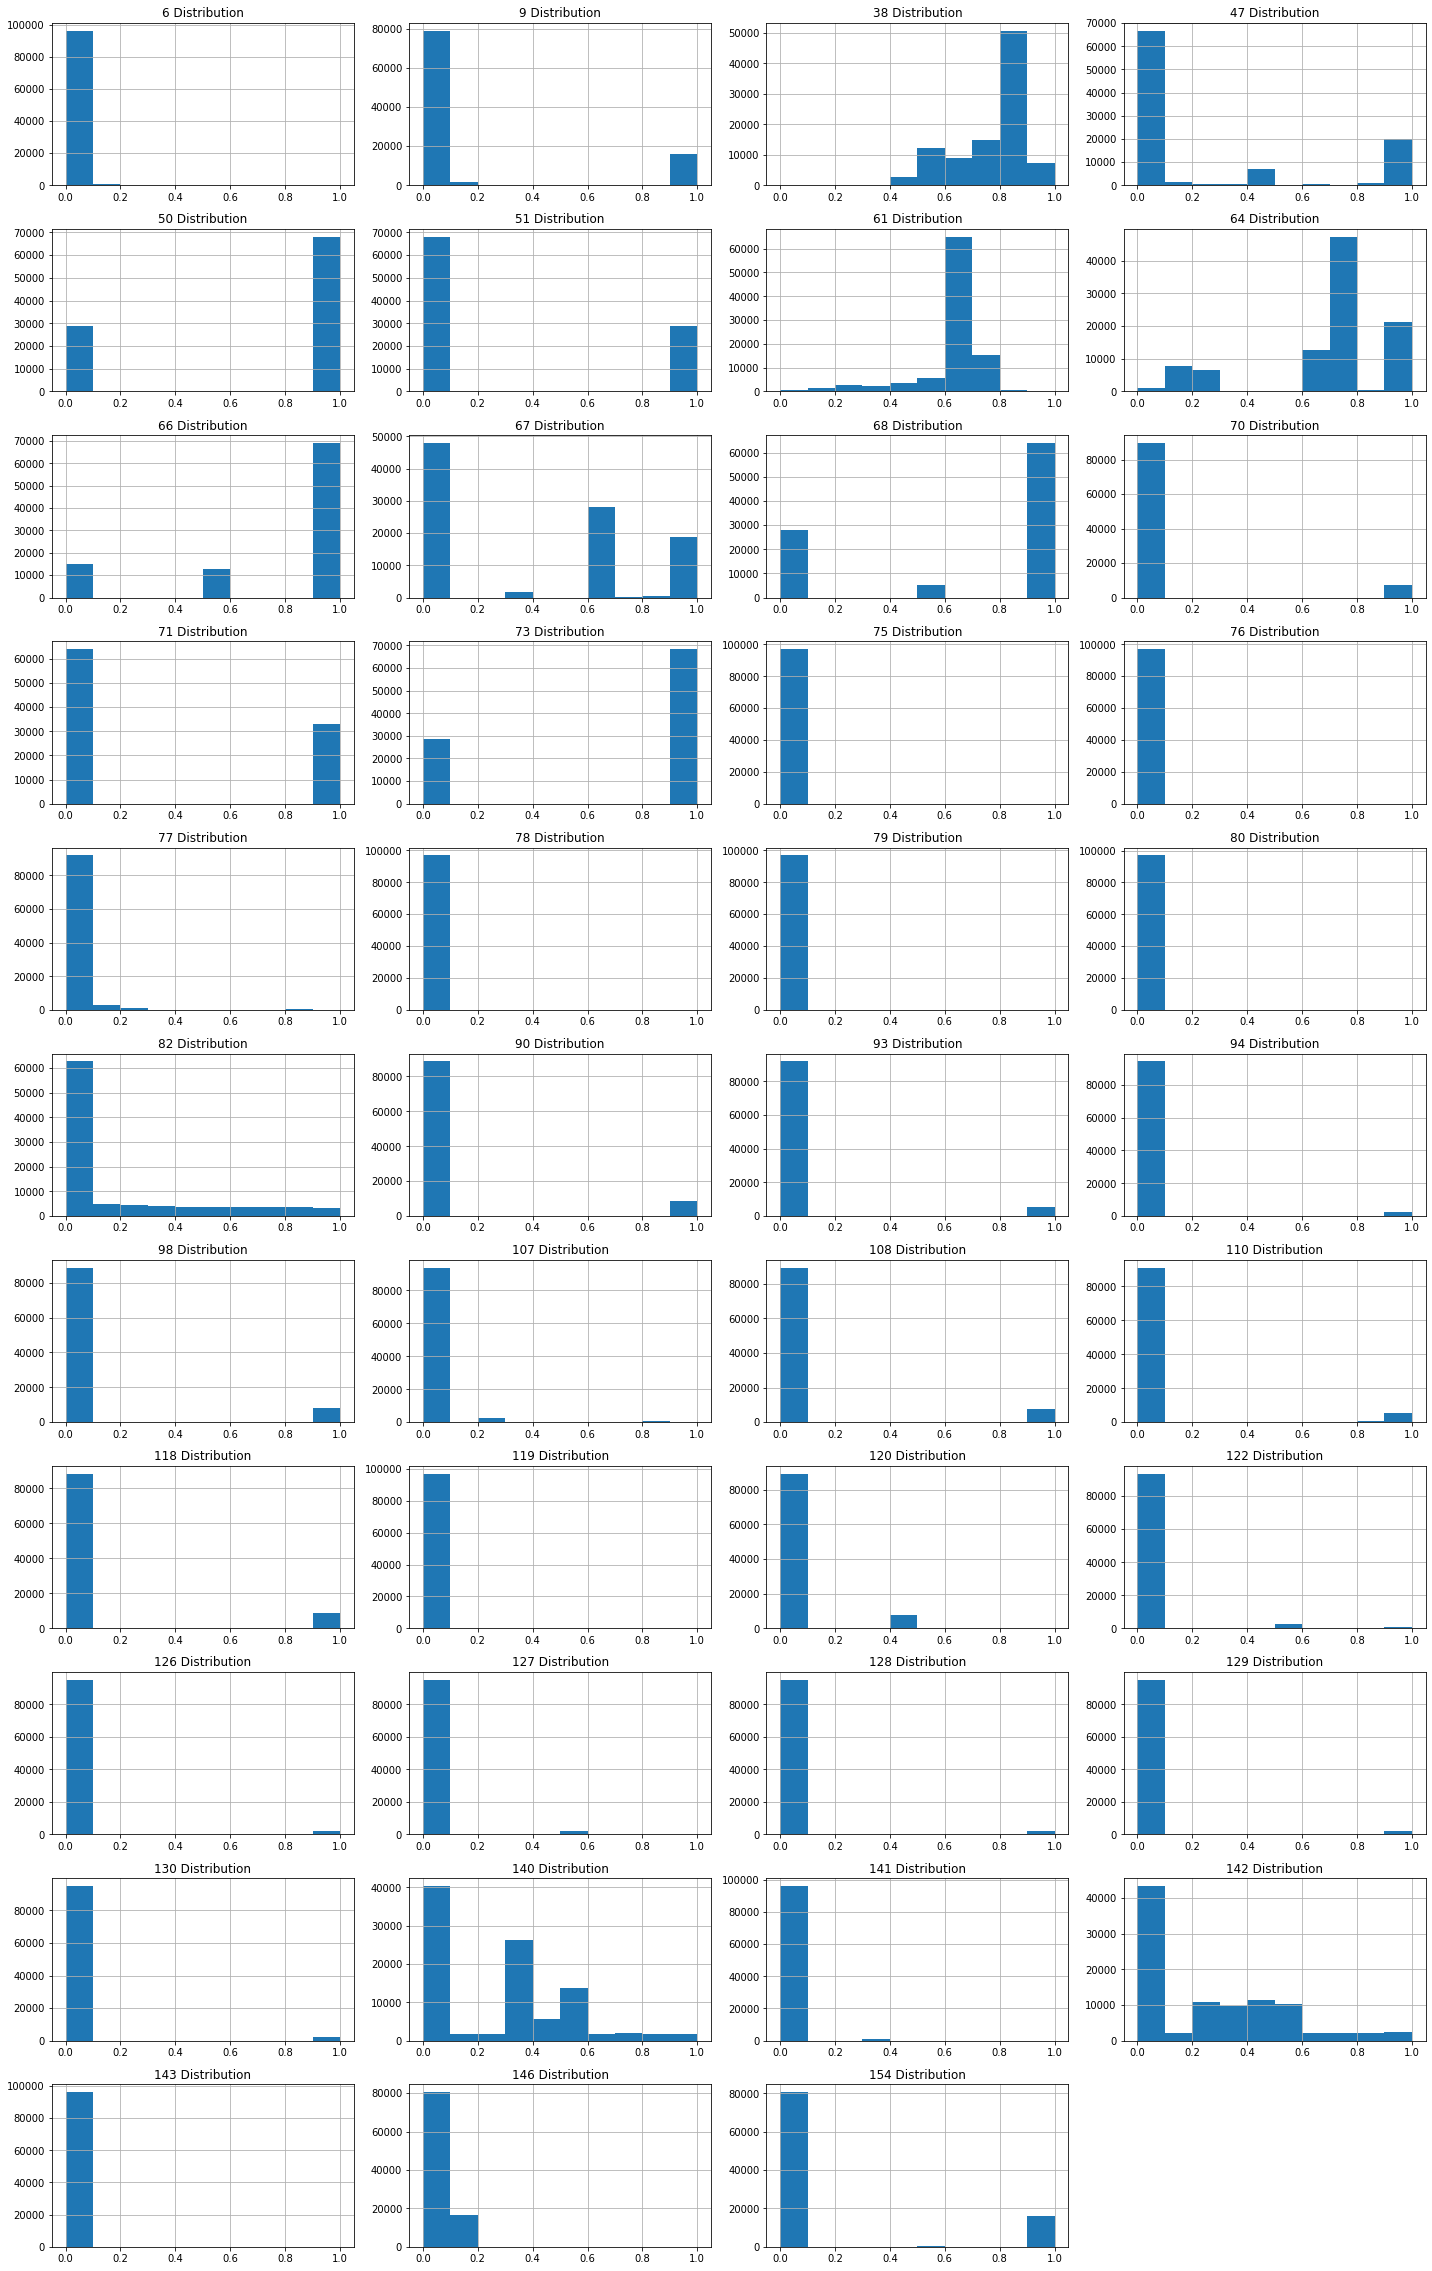

In [190]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,40))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df_with_rescaled_cols, df_with_rescaled_cols.columns, 14, 4)

### Step 5: Normalise columns with sparse data (i.e. with lots of "0"s)
* Find columns with a high percentage of "0" values, and normalise these columns
* I've set high percentage to be 75%, but we are free to amend this later.

In [191]:
# calculate the percentage of rows with "0" as value for each column in the dataframe
# we will normalise the columns with >75% "0"s

from sklearn.preprocessing import Normalizer

perc_of_zeros_by_col = df_with_rescaled_cols.apply(pd.value_counts).iloc[0] / df_with_rescaled_cols.shape[0] 
cols_to_normalise = perc_of_zeros_by_col[perc_of_zeros_by_col>0.75].index
cols_not_normalised = [i for i in df_with_rescaled_cols.columns if i not in cols_to_normalise]

X2 = df_with_rescaled_cols[cols_to_normalise].values
normScaler = Normalizer().fit(X2)
normalizedX = normScaler.transform(X2)

# join the normalised data back to the un-normalised columns, the result is a dataframe df_with_normalised_cols
df_normalised_only = pd.DataFrame(normalizedX,columns=cols_to_normalise)
df_with_normalised_cols = pd.concat([df_normalised_only,df_with_rescaled_cols[cols_not_normalised]],axis=1)

# reorder the columns from smallest to biggest
df_with_normalised_cols = df_with_normalised_cols.reindex(sorted(df_with_normalised_cols.columns, key=lambda x: float(x)), axis=1)
df_with_normalised_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,127,128,129,130,140,141,142,143,146,154
0,0.000064,0.009150,0.394895,0.88679,0,1,0.70423,0.81818,1.0,0.30769,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000012,0.000000,0.394916,0.43396,0,1,0.70423,0.65909,0.5,1.00000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036308,0.070588,0.394959,0.00000,1,0,0.59155,0.18182,0.0,0.61538,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005238,0.094771,0.395013,0.00000,1,0,0.14085,0.18182,0.0,0.61538,...,0.14797,0.295937,0.295937,0.295937,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035887,0.070588,0.395055,0.00000,1,0,0.61972,0.18182,0.0,0.61538,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
# do the same for testing dataset
X2_testing = testing_with_rescaled_cols[cols_to_normalise].values
normScaler_testing = Normalizer().fit(X2_testing)
normalizedX_testing = normScaler_testing.transform(X2_testing)

testing_normalised_only = pd.DataFrame(normalizedX_testing,columns=cols_to_normalise)
testing_with_normalised_cols = pd.concat([testing_normalised_only,testing_with_rescaled_cols[cols_not_normalised]],axis=1)
testing_with_normalised_cols = testing_with_normalised_cols.reindex(sorted(testing_with_normalised_cols.columns, key=lambda x: float(x)), axis=1)
testing_with_normalised_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,127,128,129,130,140,141,142,143,146,154
0,0.002809,0.98824,0.901749,1.00000,0,1,0.69231,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0.0,0.22215,0.0,0.477300,0.0,1.000000,0.98674
1,0.003637,0.98824,0.901759,1.00000,0,1,0.69231,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0.0,0.35106,0.0,0.185164,0.0,1.000000,0.98674
2,0.003624,0.98824,0.901759,1.00000,0,1,0.67949,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0.0,0.43700,0.0,0.475420,0.0,1.000000,0.98674
3,0.006561,0.00000,0.901759,0.43396,0,1,0.75641,0.65909,0.5,1.00000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.00000
4,0.001672,0.98824,0.901759,1.00000,0,1,0.69231,0.90909,1.0,0.61538,...,0.0,0.0,0.0,0.0,0.63621,0.0,0.899728,0.0,0.164402,0.98674


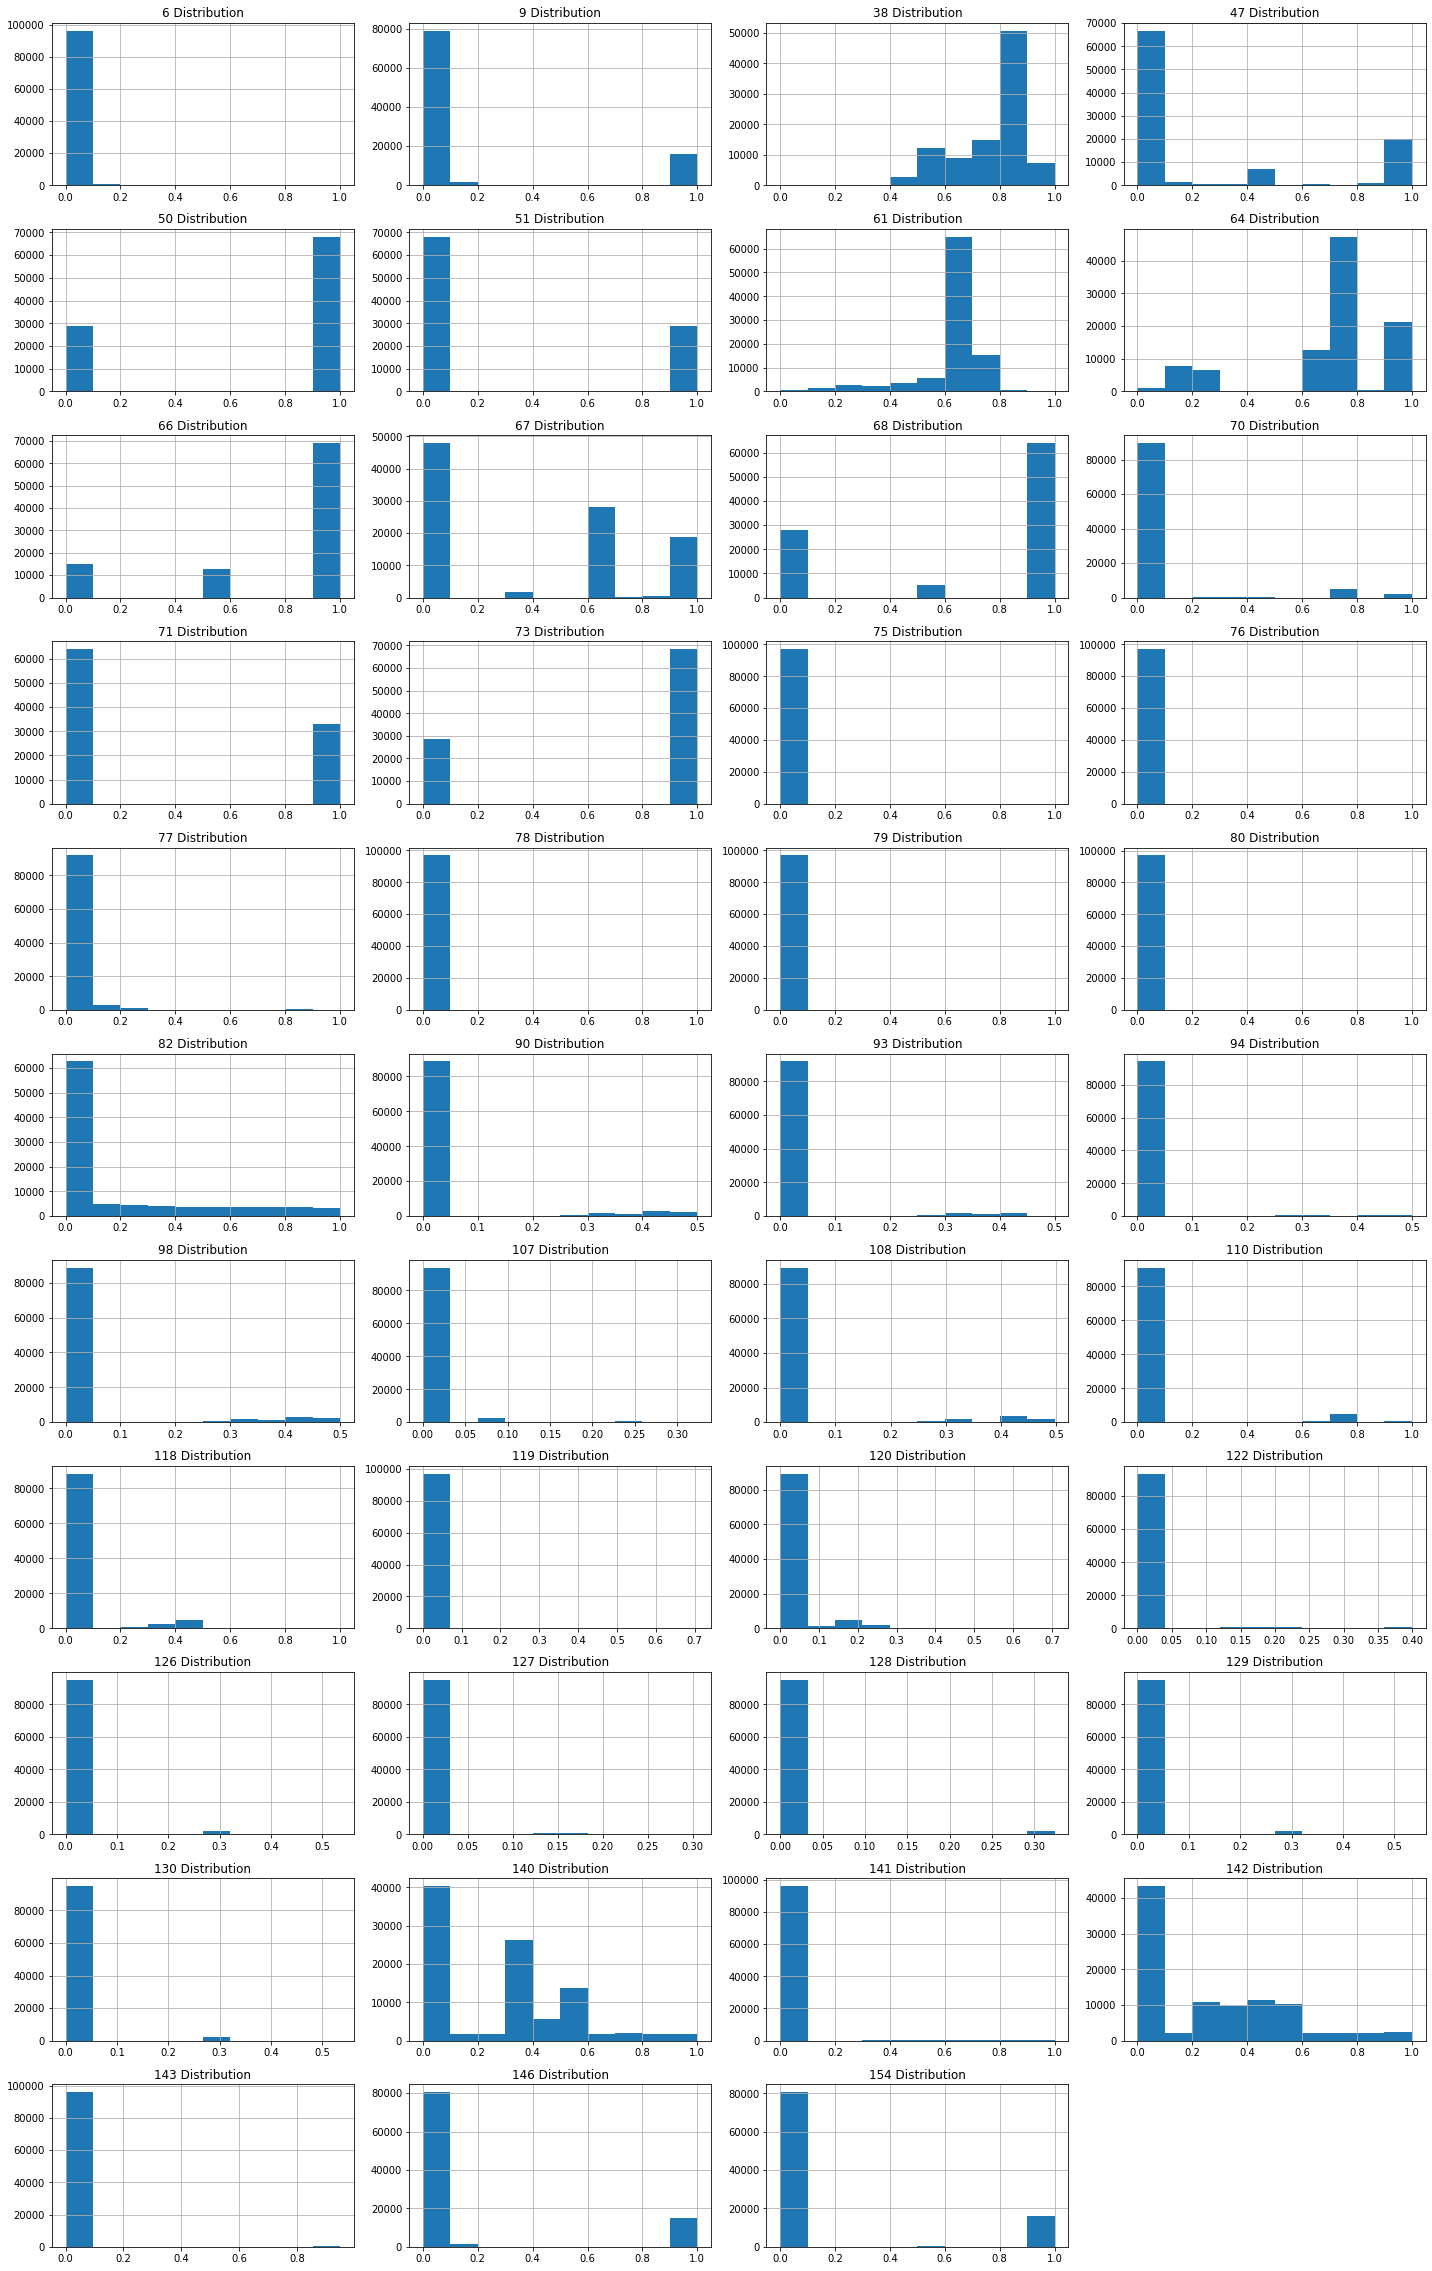

In [193]:
draw_histograms(df_with_normalised_cols, df_with_normalised_cols.columns, 14, 4)

### Step 6: Standardise data with numpy's `log` transform function
Looking at the charts above, we can see that many of the columns in the current dataframe `df_with_normalised_cols` have very skewed distribution. 

We will fill all rows which values are "0" with the column mean, and then use numpy's `log` function here to convert the skewed data. The result is a dataframe called `df_with_log_transformed_cols`
    
Note:
1. We can try other transformation later (e.g. scikit's `StandardScaler` transformation, but I didn't use it here because it would change the scale again.

2. Other potential methods to replace zeros with for log transformation:
    * Add a constant value © to each value of variable then take a log transformation (e.g. use log(x+1))
    * Impute zero value with median.
    * Take square root instead of log for transformation

In [194]:
# fill all rows with value of "0" with the column mean. 
# This is to avoid errors created by log transformation i.e. result in infinity (i.e. log of 0 is infinity)
df_filled_mean = df_with_normalised_cols.mask(df_with_normalised_cols==0).fillna(df_with_normalised_cols.mean())
df_filled_mean.head()

,6,9,38,47,50,51,61,64,66,67,...,127,128,129,130,140,141,142,143,146,154
0,0.000064,0.009150,0.394895,0.88679,0.701568,1.000000,0.70423,0.81818,1.00000,0.30769,...,0.003323,0.006409,0.006643,0.006643,0.273149,0.006692,0.261462,0.007986,0.158963,0.178474
1,0.000012,0.193837,0.394916,0.43396,0.701568,1.000000,0.70423,0.65909,0.50000,1.00000,...,0.003323,0.006409,0.006643,0.006643,0.273149,0.006692,0.261462,0.007986,0.158963,0.178474
2,0.036308,0.070588,0.394959,0.25092,1.000000,0.298215,0.59155,0.18182,0.77775,0.61538,...,0.003323,0.006409,0.006643,0.006643,0.273149,0.006692,0.261462,0.007986,0.158963,0.178474
3,0.005238,0.094771,0.395013,0.25092,1.000000,0.298215,0.14085,0.18182,0.77775,0.61538,...,0.147970,0.295937,0.295937,0.295937,0.273149,0.006692,0.261462,0.007986,0.158963,0.178474
4,0.035887,0.070588,0.395055,0.25092,1.000000,0.298215,0.61972,0.18182,0.77775,0.61538,...,0.003323,0.006409,0.006643,0.006643,0.273149,0.006692,0.261462,0.007986,0.158963,0.178474


In [195]:
# use numpy's log transformation 
df_with_log_transformed_cols = df_filled_mean.apply(np.log)
df_with_log_transformed_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,127,128,129,130,140,141,142,143,146,154
0,-9.653120,-4.693969,-0.929136,-0.120147,-0.354437,0.00000,-0.350650,-0.200673,0.000000,-1.178662,...,-5.706857,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313
1,-11.356596,-1.640739,-0.929082,-0.834803,-0.354437,0.00000,-0.350650,-0.416895,-0.693147,0.000000,...,-5.706857,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313
2,-3.315716,-2.650895,-0.928973,-1.382622,0.000000,-1.20994,-0.525009,-1.704738,-0.251350,-0.485515,...,-5.706857,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313
3,-5.251877,-2.356292,-0.928838,-1.382622,0.000000,-1.20994,-1.960060,-1.704738,-0.251350,-0.485515,...,-1.910744,-1.217610,-1.217610,-1.217610,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313
4,-3.327381,-2.650895,-0.928729,-1.382622,0.000000,-1.20994,-0.478488,-1.704738,-0.251350,-0.485515,...,-5.706857,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313


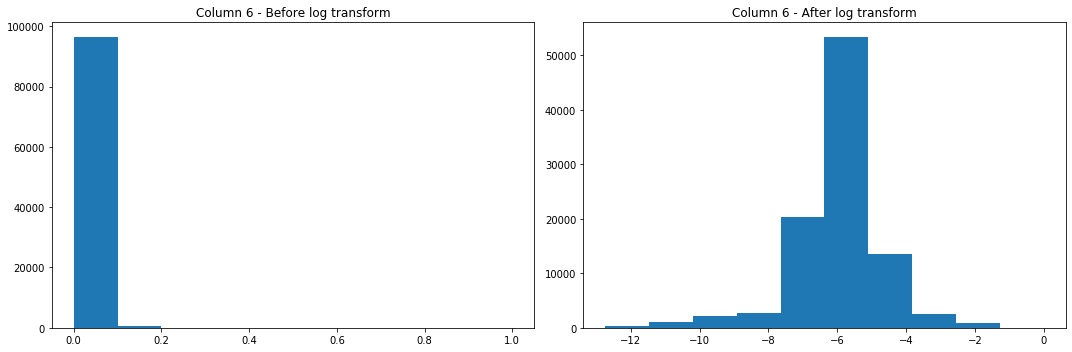

In [196]:
# An example of a column before vs after log transformation
fig=plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Column 6 - Before log transform")
plt.hist(df_with_normalised_cols["6"])
plt.subplot(1, 2, 2)
plt.title("Column 6 - After log transform")
plt.hist(df_with_log_transformed_cols["6"])
plt.tight_layout()
plt.show()

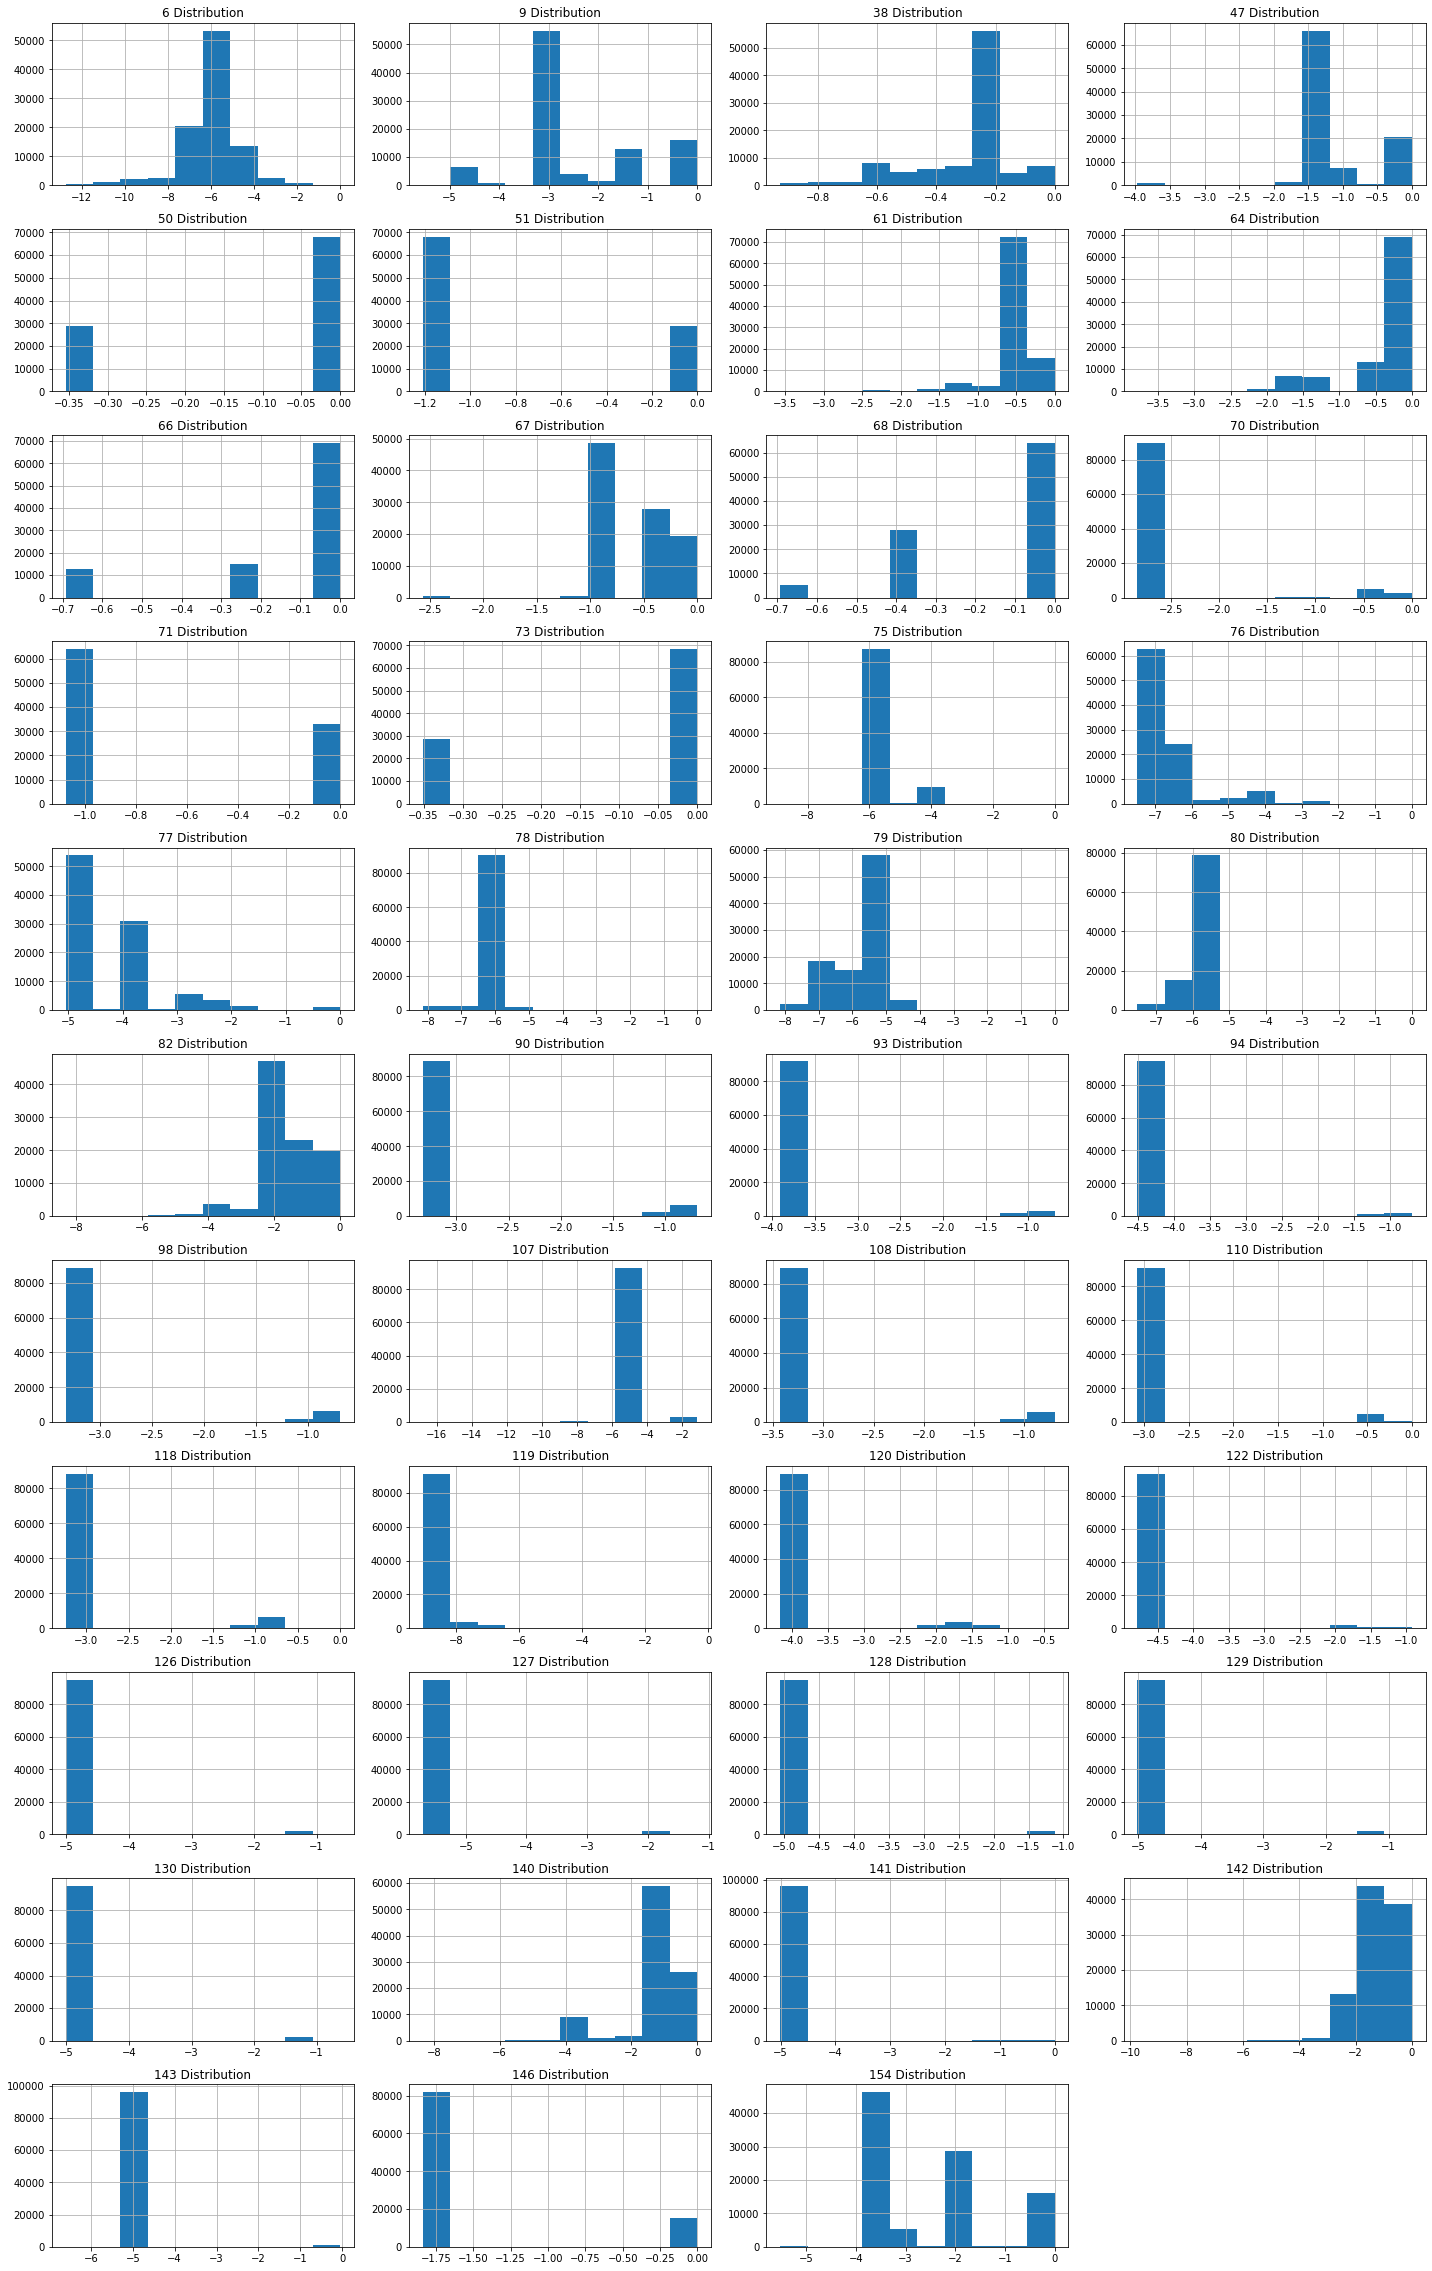

In [197]:
# take a look at the final trainting dataset - we can see that there're still many columns with very skewed data
# but I haven't removed them here because the majority of the traffic in the dataset (99%) are normal data

draw_histograms(df_with_log_transformed_cols, df_with_log_transformed_cols.columns, 14, 4)

In [198]:
training_final = pd.concat([df_with_log_transformed_cols,y_training],axis=1)
training_final.to_csv("Datasets/final_training.csv",index=True)

In [199]:
# do the same log transformation for testing data & export to CSV

testing_filled_mean = testing_with_normalised_cols.mask(testing_with_normalised_cols==0).fillna(testing_with_normalised_cols.mean())
testing_with_log_transformed_cols = testing_filled_mean.apply(np.log)
testing_with_log_transformed_cols.head()

testing_final = pd.concat([testing_with_log_transformed_cols,y_testing],axis=1)
testing_final.to_csv("Datasets/final_testing.csv",index=True)


In [200]:
training_final.head()

,6,9,38,47,50,51,61,64,66,67,...,128,129,130,140,141,142,143,146,154,155
0,-9.653120,-4.693969,-0.929136,-0.120147,-0.354437,0.00000,-0.350650,-0.200673,0.000000,-1.178662,...,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313,0
1,-11.356596,-1.640739,-0.929082,-0.834803,-0.354437,0.00000,-0.350650,-0.416895,-0.693147,0.000000,...,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313,0
2,-3.315716,-2.650895,-0.928973,-1.382622,0.000000,-1.20994,-0.525009,-1.704738,-0.251350,-0.485515,...,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313,0
3,-5.251877,-2.356292,-0.928838,-1.382622,0.000000,-1.20994,-1.960060,-1.704738,-0.251350,-0.485515,...,-1.217610,-1.217610,-1.217610,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313,0
4,-3.327381,-2.650895,-0.928729,-1.382622,0.000000,-1.20994,-0.478488,-1.704738,-0.251350,-0.485515,...,-5.050084,-5.014196,-5.014196,-1.297738,-5.006854,-1.341466,-4.83009,-1.839081,-1.723313,0


In [201]:
testing_final.head()

,6,9,38,47,50,51,61,64,66,67,...,128,129,130,140,141,142,143,146,154,155
0,-5.875092,-0.011830,-0.103419,0.000000,-0.443921,0.0,-0.367721,-0.095311,0.000000,-0.485515,...,-4.730798,-4.67354,-4.67354,-1.504402,-2.048893,-0.739611,-4.319599,0.000000,-0.013349,0
1,-5.616679,-0.011830,-0.103408,0.000000,-0.443921,0.0,-0.367721,-0.095311,0.000000,-0.485515,...,-4.730798,-4.67354,-4.67354,-1.046798,-2.048893,-1.686515,-4.319599,0.000000,-0.013349,0
2,-5.620211,-0.011830,-0.103408,0.000000,-0.443921,0.0,-0.386413,-0.095311,0.000000,-0.485515,...,-4.730798,-4.67354,-4.67354,-0.827822,-2.048893,-0.743558,-4.319599,0.000000,-0.013349,0
3,-5.026635,-1.606249,-0.103408,-0.834803,-0.443921,0.0,-0.279172,-0.416895,-0.693147,0.000000,...,-4.730798,-4.67354,-4.67354,-2.104124,-2.048893,-1.628810,-4.319599,-1.886272,-1.687282,0
4,-6.393531,-0.011830,-0.103408,0.000000,-0.443921,0.0,-0.367721,-0.095311,0.000000,-0.485515,...,-4.730798,-4.67354,-4.67354,-0.452227,-2.048893,-0.105663,-4.319599,-1.805439,-0.013349,0


## Result
* Number of columns in the original dataset: 153
* Removed 102 columns from the dataset due to:
  + all rows having the same value, e.g. "0" or "1" (74 in total)
  + insufficient information (i.e. the most frequent value fills > 99% of the rows) (25 in total)
  + duplicate columns (3 in total)
* Rescaled all columns to the range (0,1) by using `MinMaxScaler`
* Normaliseded columns which have >75% of values equal to "0" by using `Normalizer` (26 in total)
* Standardised all columns by using numpy's log transformation
* Applied the same set of preprocessing to the testing dataset
* Exported the proprocessed training and testing datasets out to CSV

## Further actions:
* Try rescaling with `StandardScaler`?
* Discretization with `KBinsDiscretizer` or `Binarizer`
https://scikit-learn.org/stable/modules/preprocessing.html#discretization

In [202]:
# for StandardSclaer
# tried this, but I didn't go ahead with it because it changed the scales for each columns again. We can try again later.
# from sklearn.preprocessing import StandardScaler

# X3 = df_with_normalised_cols.values
# stdScaler = StandardScaler().fit(X3)
# stdScaledX = stdScaler.transform(X3)
# stdScaledX

# df_stdscaled_cols = pd.DataFrame(stdScaledX,columns=list(df_with_normalised_cols.columns))

# df_stdscaled_cols.head()